In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


<hr>

### Understanding data

In [4]:
train.shape

(50553, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


<hr>
<ul>
    <li>There are 6 numerical columns</li>
    <li>There are 6 categorical columns</li>
    <li>Gender column has a lot of missing values</li>
</ul>

In [6]:
train.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [7]:
total_null = train['Gender'].isnull().sum()
total_len = len(train)

null_percent = (total_null/total_len)*100
print(null_percent)

71.11941922338931


<hr>
<ul>
  <li> Gender column has 71% null values </li>
</ul>

In [8]:
train.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


<hr>

<ul>
    <li>Duration is highly positively skewed</li>

<li>Net Sales is positively skewed</li>

<li>Commision is positively skewed</li>

<li>Age is positively skewed</li>
</ul>

<hr>

### Checking correlation

                            ID     Claim  Duration  Net Sales  \
ID                    1.000000  0.040265  0.029771   0.084391   
Claim                 0.040265  1.000000  0.076442   0.138323   
Duration              0.029771  0.076442  1.000000   0.437004   
Net Sales             0.084391  0.138323  0.437004   1.000000   
Commision (in value)  0.114668  0.102009  0.349193   0.657851   
Age                   0.009026 -0.012106  0.003212   0.039119   

                      Commision (in value)       Age  
ID                                0.114668  0.009026  
Claim                             0.102009 -0.012106  
Duration                          0.349193  0.003212  
Net Sales                         0.657851  0.039119  
Commision (in value)              1.000000  0.119167  
Age                               0.119167  1.000000  
-------------------------------------------------------------------


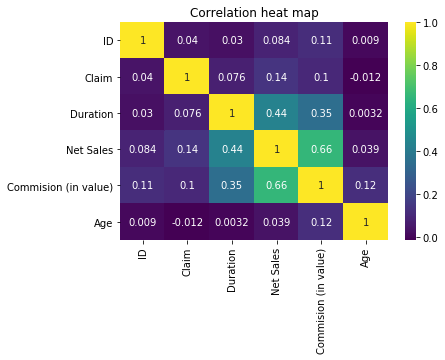

In [9]:
corr = train.corr()
print(corr)
print("-------------------------------------------------------------------")
sns.heatmap(corr,cmap='viridis',annot=True)
plt.title("Correlation heat map")
plt.show()

<hr>
<ul>
    <li> No features are highly correlated with target</li>
    <li> Only net sales and commision has better correlation of 0.67</li>
</ul>

In [10]:
train.drop(['ID','Gender'],axis=1,inplace=True)

In [11]:
train.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,31
1,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,75
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,32
4,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,29


<hr>

### Check target distribution

In [12]:
y_train = train['Claim']

0    49812
1      741
Name: Claim, dtype: int64
----------------------------------------------------


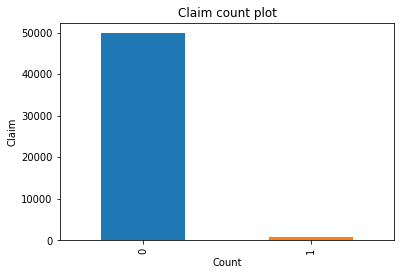

In [13]:
y_counts = y_train.value_counts()
print(y_counts)
print("----------------------------------------------------")
y_counts.plot(kind="bar")
plt.title("Claim count plot")
plt.xlabel("Count")
plt.ylabel("Claim")
plt.show()

<hr>
<ul>
    <li> Target data is imbalance </li>
    <li> Only 1.46% is 1 and 98.5% is 0 </li>
</ul>

<hr>

### Check numerical and categorical feature distribution

In [14]:
X_train = train.drop(['Claim'],axis=1)

In [15]:
# Separating numerical and categorical columns
num_col = X_train.select_dtypes(['int64','float64'])
cat_col = X_train.select_dtypes(['object'])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


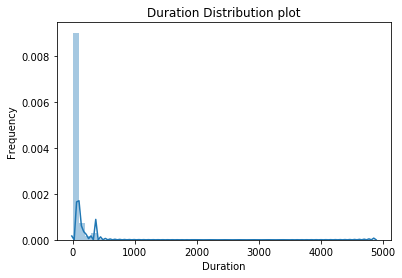

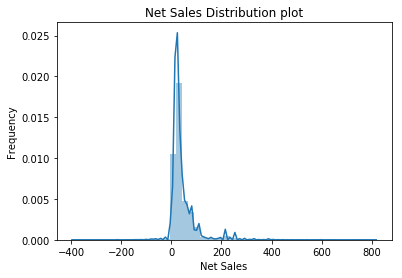

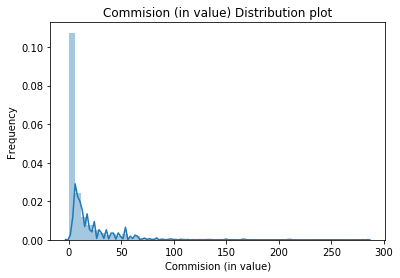

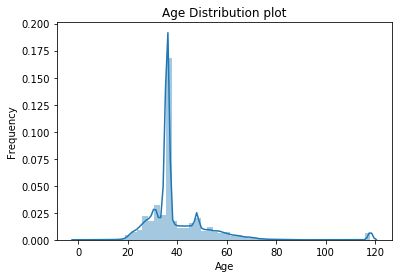

In [16]:
for col in num_col:
    sns.distplot(train[col])
    plt.title(col+" Distribution plot")
    plt.ylabel("Frequency")
    plt.show()

<hr>

<ul>
    <li> As we observed earlier Duration, Net Sales, Commision, Age are positively skewed</li>
</ul>


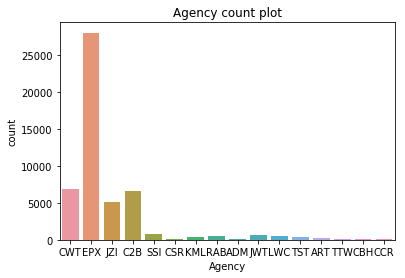

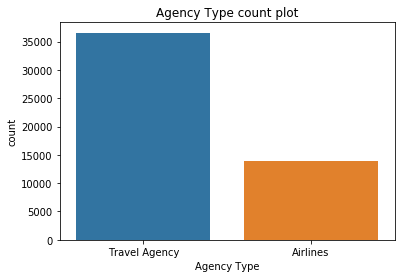

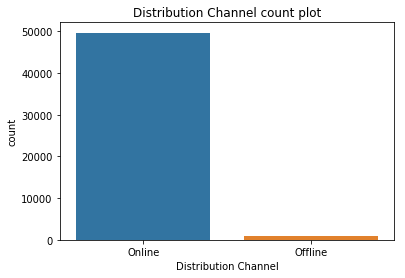

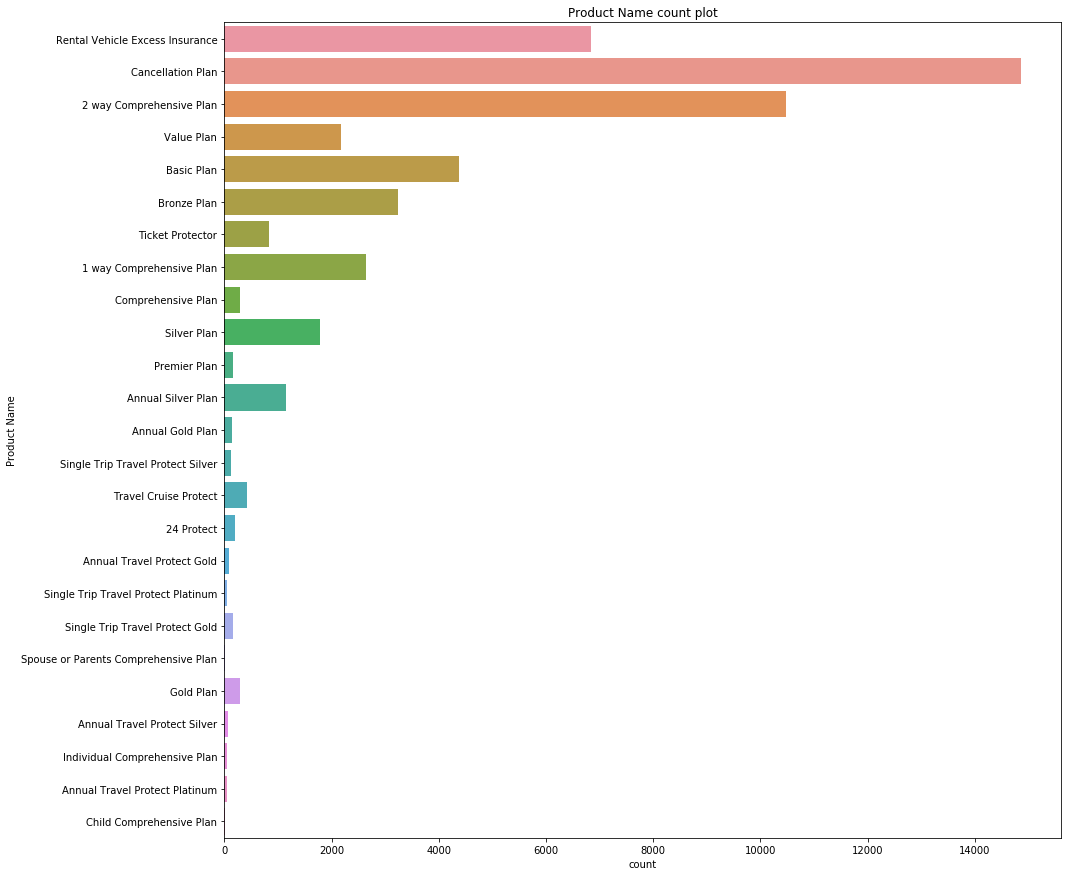

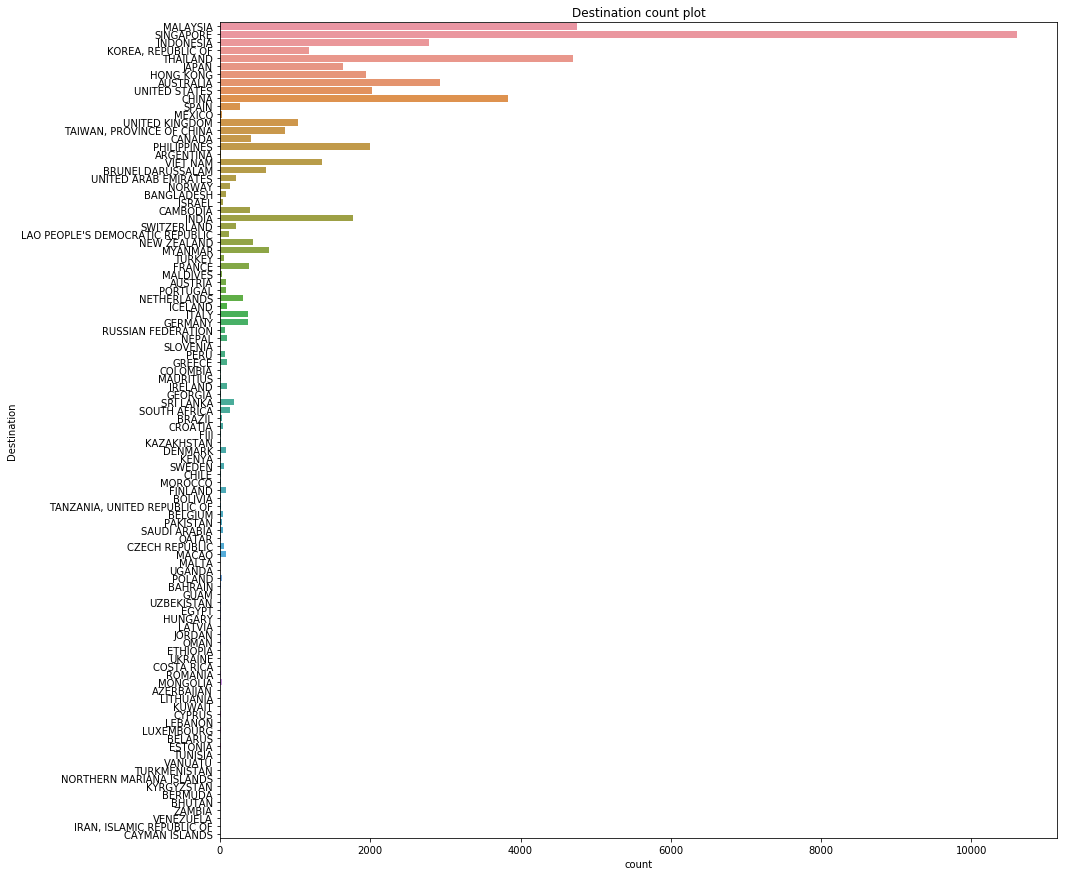

In [17]:
i=0
for col in cat_col:
    if i>=3:
        plt.figure(figsize=(15,15))
        sns.countplot(y=train[col])
        plt.title(col+" count plot")
        plt.show()
        i+=1
        continue
    sns.countplot(train[col])
    plt.title(col+" count plot")
    plt.show()
    i+=1

<hr>

<ul>
    <li> Categorical columns data are also imbalanced </li>
</ul>

<hr>

### Check distribution with respect to target

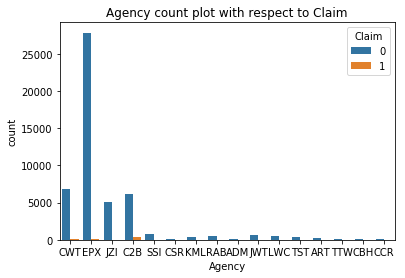

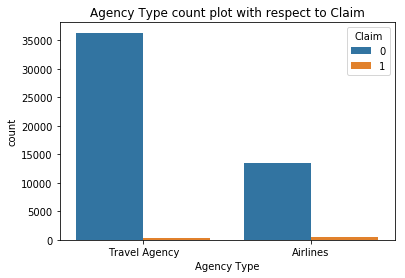

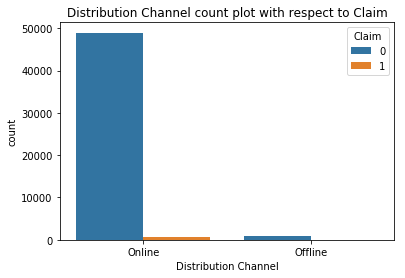

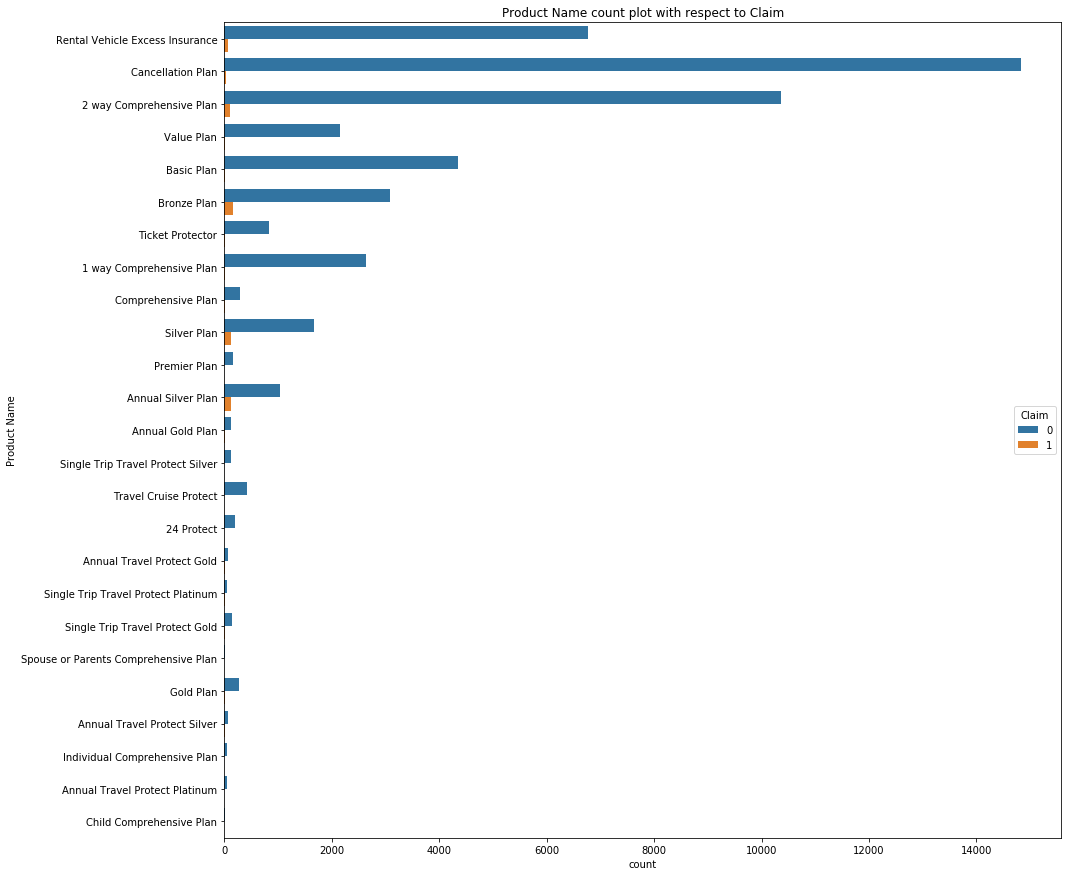

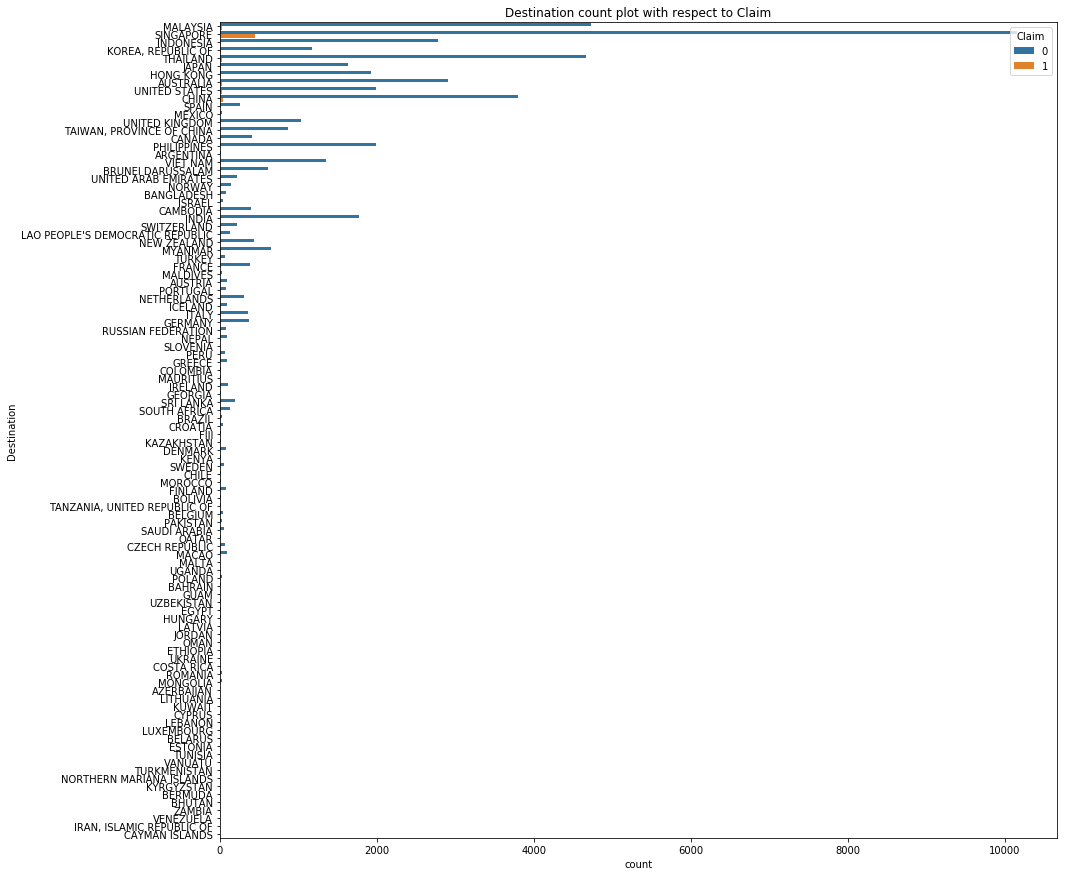

In [18]:
i=0
for col in cat_col:
    
    if i>=3:
        plt.figure(figsize=(15,15))
        sns.countplot(y=train[col],hue=train['Claim'])
        plt.title(col+" count plot with respect to Claim")
        plt.show()
        i+=1
        continue
    sns.countplot(train[col],hue=train['Claim'])
    plt.title(col+" count plot with respect to Claim")
    plt.show()
    i+=1

<hr>

<ul>
  <li>Singapore destination has more 1s</li>
</ul>

<hr>

### Checking correlation using scatter plot 

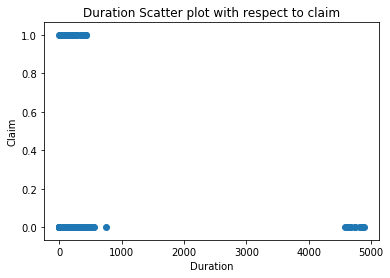

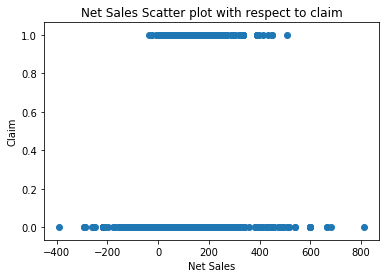

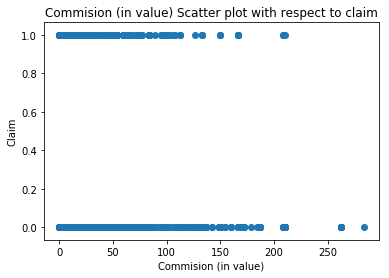

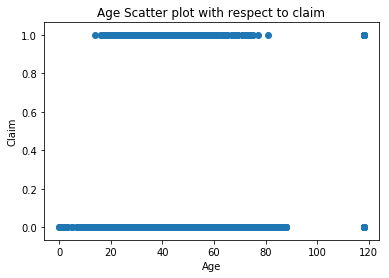

In [19]:
for col in num_col:
    plt.title(col+" Scatter plot with respect to claim")
    plt.xlabel(col)
    plt.ylabel("Claim")
    plt.scatter(x=train[col],y=y_train)
    plt.show()

<hr>

<ul>
  <li>As observed earlier, no features are highly correlated with target</li>
</ul>

<hr>

### Check skewness

In [20]:
for col in num_col:
    print("{}:{}".format(col,skew(train[col])),end="\n\n")

Duration:22.872063891229274

Net Sales:3.3281441910342053

Commision (in value):4.0780684356634636

Age:2.9783898494112435



<hr>

<ul>
   <li>Hence proved our previous observation with actual skew values</li>
    <li>Duration is highly positively skewed</li>

<li>Net Sales is positively skewed</li>

<li>Commision is positively skewed</li>

<li>Age is positively skewed</li>
    
</ul>

<hr>

### Check outliers

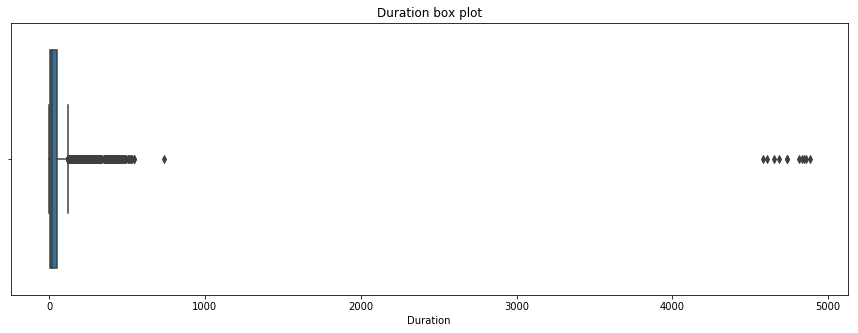

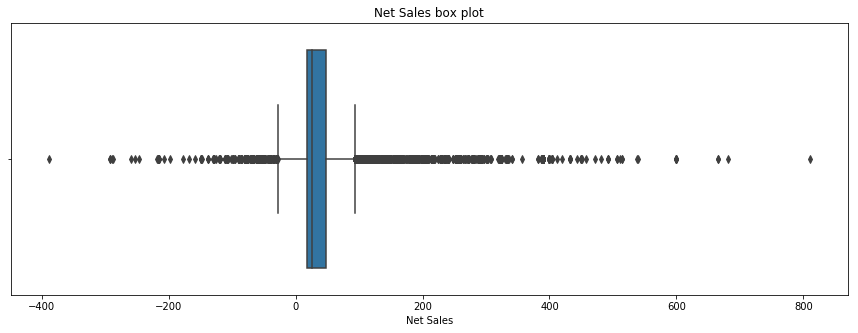

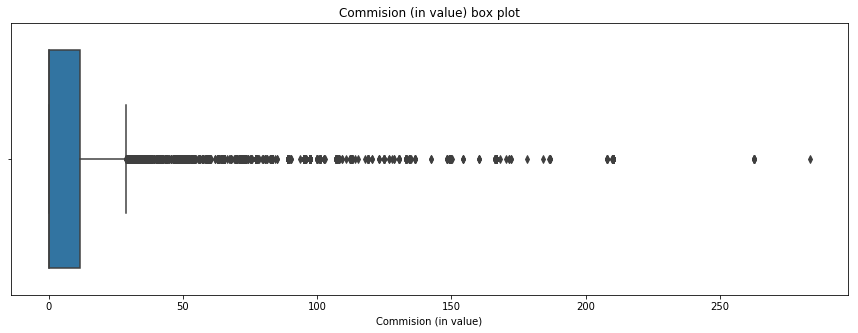

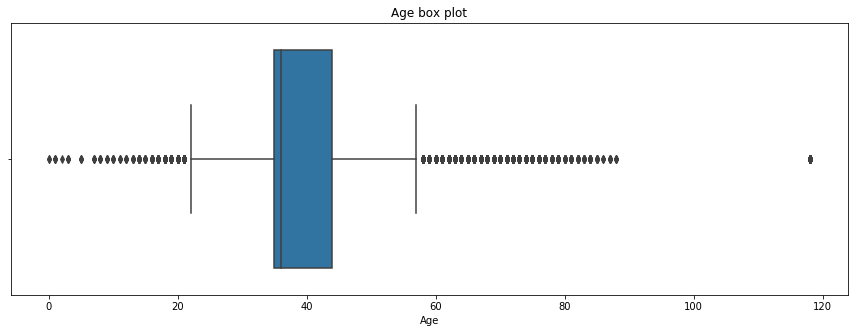

In [21]:
for col in num_col:

    plt.figure(figsize=(15,5))
    plt.title(col+" box plot")
    sns.boxplot(train[col])
    plt.show()


<hr>
<ul>
  <li>All columns have large number of outliers</li>
</ul>